**ANALISIS SENTIMEN APLIKASI GET CONTACT MENGGUNAKAN ALGORITMA SUPPORT VECTOR MACHINE**

Berikut ini adalah kode program dan hasil analisis sentimen aplikasi GetContact dengan menggunakan algoritma Support Vector Machine (SVM).

**Import Library**

In [1]:
#Library Bacic Operation
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt

# LibaryText Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer
from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Library Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics

# Library Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
!pip install google-play-scraper

**Scrapping 10000 data review GetContact**

Melakukan scrapping data ulasan aplikasi GetContact dari google play store. Data yang diambil sebanyak 10000 ulasan.

In [3]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'app.source.getcontact',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=10000, # defaults to 100
    filter_score_with=None
)

In [4]:
print(result[0])

{'reviewId': 'eedff385-a89f-41cf-add0-2851c673f6ad', 'userName': 'Muhharifah “Ambar” Rani', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjXOxqkIxJsLD7ldk7TrULpq5l7nnYxSKnV9HG_AC99FXvw', 'content': 'Menurutku bagus lah bisa liat nama kontak ku di namain apa buat kalian yg gak bisa coba lagi deh aku bisa kok tapi tolong biar bisa liat sepuasnya ke semua kontak gitu kalok dibatasin kan gak seru menurut itu aja tingkatin lagi deh aplikasinya', 'score': 4, 'thumbsUpCount': 732, 'reviewCreatedVersion': '6.4.2', 'at': datetime.datetime(2023, 12, 17, 10, 4, 50), 'replyContent': None, 'repliedAt': None, 'appVersion': '6.4.2'}


In [5]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,eedff385-a89f-41cf-add0-2851c673f6ad,Muhharifah “Ambar” Rani,https://play-lh.googleusercontent.com/a-/ALV-U...,Menurutku bagus lah bisa liat nama kontak ku d...,4,732,6.4.2,2023-12-17 10:04:50,None,NaT,6.4.2
1,302bfb3a-4ca7-4f3f-9fe4-5f5540aa0654,HIKA ARCH,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tidak bisa input nomer dengan benar, padahal u...",1,60,6.4.2,2023-12-19 15:34:37,"Halo, Mohon maaf atas ketidaknyamanannya. Sila...",2023-12-19 19:41:06,6.4.2
2,4dac4503-4dc1-4126-8592-bad4287f8ada,Rizky Febriantono,https://play-lh.googleusercontent.com/a-/ALV-U...,Setelah di upgrade ke premium malah seperti ap...,1,256,6.4.2,2023-12-10 12:11:16,"Halo, Silahkan lengkapi formulir berikut dan s...",2023-12-10 15:18:30,6.4.2
3,68262c8b-f3e6-4333-9cd5-2553fc24df0b,Aini Bangko,https://play-lh.googleusercontent.com/a/ACg8oc...,"Maaf memberi nilai Segini, karena, Saya ingin ...",1,22,6.4.2,2023-12-14 07:10:33,"Halo, Jika Anda kesulitan mendapatkan kode ver...",2023-12-14 13:59:03,6.4.2
4,f80a0991-e7a1-424a-b762-04f27a9b614a,Mufrodah,https://play-lh.googleusercontent.com/a-/ALV-U...,Saya baru menggunakan Getcontact karena butuh ...,5,18,6.4.2,2023-12-08 02:45:38,None,NaT,6.4.2
...,...,...,...,...,...,...,...,...,...,...,...
9995,a4ee7982-789a-4818-bcbc-c115129fb7f5,sa Lina,https://play-lh.googleusercontent.com/a-/ALV-U...,Kebanyakan iklan,5,0,6.2.0,2023-08-02 05:27:24,None,NaT,6.2.0
9996,e9c3ab5a-50db-48ef-95a5-b8a6f67b57c3,Erwin Fransisco,https://play-lh.googleusercontent.com/a-/ALV-U...,Kebanyakan iklan,3,0,6.3.0,2023-08-23 03:49:37,None,NaT,6.3.0
9997,73aa40ba-fd98-46ce-ac2d-576b969531e9,Uni Mawarnisa,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tidak dapat masuk lagi ke getcontact, padahal ...",1,0,5.7.18,2022-08-31 16:01:30,"Halo, Silahkan lengkapi formulir berikut dan s...",2022-09-01 09:57:32,5.7.18
9998,5aaeca6b-fd65-4fe4-84b1-11742ba0eecf,Andi Doink,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya kasih bintang tiga masa udah saya cari da...,3,0,None,2022-02-20 10:10:13,None,NaT,None


In [6]:
scrappeddata1 = data[['content','score','at']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=True) #Sort by Newest, change to True if you want to sort by Oldest.
sorteddata.head()

,content,score,at
4195,aplikasi ini bukan hanya untuk melihat tagar n...,5,2019-05-15 22:34:35
7840,Untuk yang mau ngecek nomor kita disimpan paka...,4,2019-05-16 22:02:10
2789,Worth it kok bisa tau nama kita disave apa aja...,5,2019-05-19 08:50:03
2134,"sesuai iklannn, yg bilang gamuncul nama kita y...",5,2019-05-25 14:07:03
3878,Mengambil data dari kontak hp secara sadar (ka...,1,2019-07-11 15:11:09


In [7]:
sorteddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4195 to 2451
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  10000 non-null  object        
 1   score    10000 non-null  int64         
 2   at       10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 312.5+ KB


In [8]:
sorteddata['Year'] = sorteddata['at'].dt.year
sorteddata['Month'] = sorteddata['at'].dt.month
sorteddata['Day'] = sorteddata['at'].dt.day

sorteddata

,content,score,at,Year,Month,Day
4195,aplikasi ini bukan hanya untuk melihat tagar n...,5,2019-05-15 22:34:35,2019,5,15
7840,Untuk yang mau ngecek nomor kita disimpan paka...,4,2019-05-16 22:02:10,2019,5,16
2789,Worth it kok bisa tau nama kita disave apa aja...,5,2019-05-19 08:50:03,2019,5,19
2134,"sesuai iklannn, yg bilang gamuncul nama kita y...",5,2019-05-25 14:07:03,2019,5,25
3878,Mengambil data dari kontak hp secara sadar (ka...,1,2019-07-11 15:11:09,2019,7,11
...,...,...,...,...,...,...
659,"Kode verifikasi nya ga muncul"". Aneh",1,2023-12-20 11:27:25,2023,12,20
2381,Terimakasih.. Sangat membantu sekali,5,2023-12-20 11:31:33,2023,12,20
2128,"Apknya bagus banget, lebih bagus lagi kalo bis...",5,2023-12-20 11:44:46,2023,12,20
6540,Aplikasi jadi gak jelas. Baru juga mau login l...,1,2023-12-20 12:41:57,2023,12,20


In [9]:
df = sorteddata[['content','score','Year','Month','Day']]
df

,content,score,Year,Month,Day
4195,aplikasi ini bukan hanya untuk melihat tagar n...,5,2019,5,15
7840,Untuk yang mau ngecek nomor kita disimpan paka...,4,2019,5,16
2789,Worth it kok bisa tau nama kita disave apa aja...,5,2019,5,19
2134,"sesuai iklannn, yg bilang gamuncul nama kita y...",5,2019,5,25
3878,Mengambil data dari kontak hp secara sadar (ka...,1,2019,7,11
...,...,...,...,...,...
659,"Kode verifikasi nya ga muncul"". Aneh",1,2023,12,20
2381,Terimakasih.. Sangat membantu sekali,5,2023,12,20
2128,"Apknya bagus banget, lebih bagus lagi kalo bis...",5,2023,12,20
6540,Aplikasi jadi gak jelas. Baru juga mau login l...,1,2023,12,20


In [10]:
df.to_csv("scrapped_data.csv", index = False)  #kemudian disave menjadi file csv

In [11]:
df['score'].value_counts()

1    4951
5    2587
4     881
2     812
3     769
Name: score, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4195 to 2451
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10000 non-null  object
 1   score    10000 non-null  int64 
 2   Year     10000 non-null  int64 
 3   Month    10000 non-null  int64 
 4   Day      10000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 468.8+ KB


**Jumlah Review Berdasarkan Rating**

<Axes: xlabel='score'>

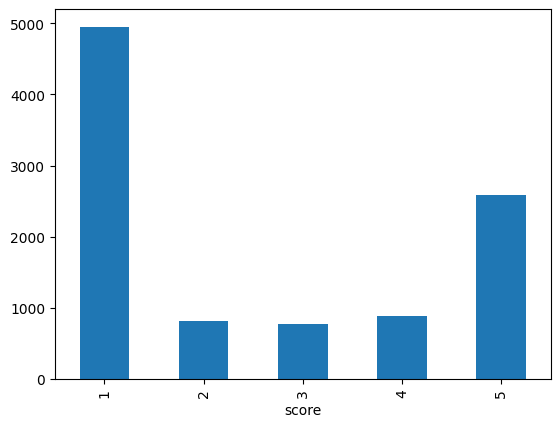

In [13]:
df.groupby(['score']).size().plot(kind = "bar")

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Distribusi Rating Ulasan**

<Axes: xlabel='score'>

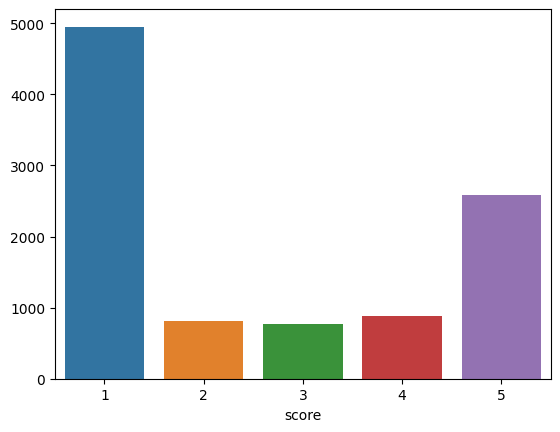

In [15]:
result = df.groupby(['score']).size()

# plot the result
sns.barplot(x = result.index, y = result.values)

**Menambahkan Kolom Sentimen**

Menambahkan kolom sentimen dengan kriteria,
Score 1 dan adalah negatif dengan kode -1,
Score 3 adalah netral dengan kode angka 0, dan
score 4 dan 5 adalah positif dengan kode 1.

In [16]:
sentimen = []
for index, row in df.iterrows():
    if row['score'] > 3 :
        sentimen.append(1)
    elif row['score'] == 3:
        sentimen.append(0)
    else:
        sentimen.append(-1)
df['sentiment'] = sentimen
df.head()

,content,score,Year,Month,Day,sentiment
4195,aplikasi ini bukan hanya untuk melihat tagar n...,5,2019,5,15,1
7840,Untuk yang mau ngecek nomor kita disimpan paka...,4,2019,5,16,1
2789,Worth it kok bisa tau nama kita disave apa aja...,5,2019,5,19,1
2134,"sesuai iklannn, yg bilang gamuncul nama kita y...",5,2019,5,25,1
3878,Mengambil data dari kontak hp secara sadar (ka...,1,2019,7,11,-1


**Distribusi Sentimen**

<Axes: xlabel='sentiment'>

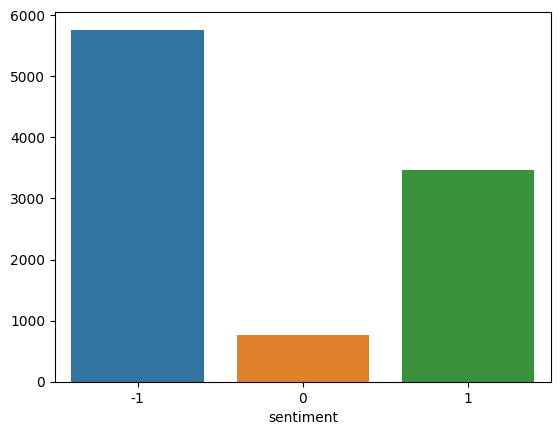

In [17]:
df_new = df[['Year', 'Month', 'sentiment']]
#df_new
result = df_new.groupby(['sentiment']).size()

# plot the result
sns.barplot(x = result.index, y = result.values)

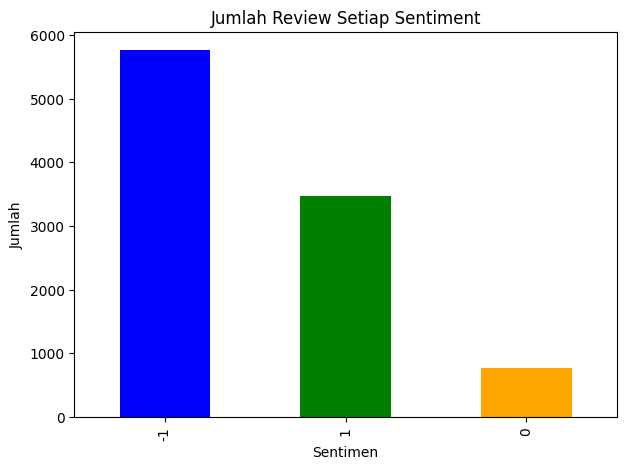

In [19]:
fig = plt.figure(figsize=(7,5))
color = ['blue','green','orange']
df_new['sentiment'].value_counts().plot(kind='bar',color = color)
plt.title('Jumlah Review Setiap Sentiment')
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')
plt.grid(False)
plt.show()

**Visualisasi Sentimen Dalam Bnetuk Pie Chart**

Text(0.5, 1.0, 'Persentase Distribusi Sentimen')

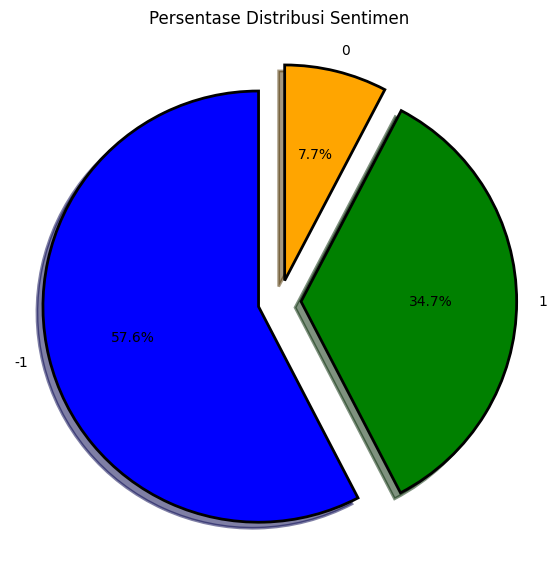

In [23]:
fig = plt.figure(figsize=(7,7))
colors = ('blue', 'green', 'orange')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df_new['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Persentase Distribusi Sentimen')

**Distribusi Sentimen Per Tahun**

<Axes: xlabel='Year', ylabel='count'>

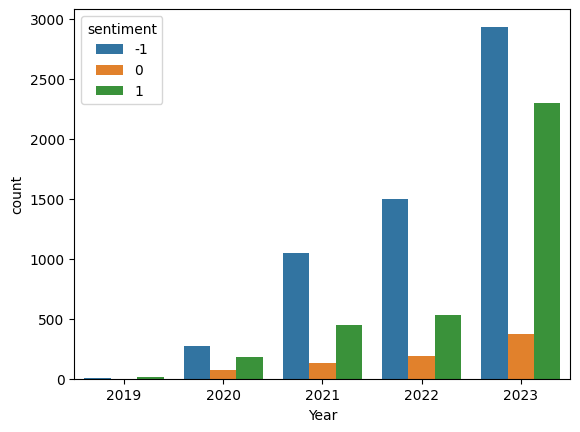

In [24]:
import seaborn as sns
sns.countplot(data=df_new,x='Year',hue='sentiment')

In [25]:
df2 = df_new.groupby(['Year'])['Month'].count()
df2

Year
2019      23
2020     527
2021    1632
2022    2217
2023    5601
Name: Month, dtype: int64

In [27]:
df3 = df_new.groupby(['Year','sentiment'])['sentiment'].count()
df3


Year  sentiment
2019  -1              9
       0              1
       1             13
2020  -1            272
       0             70
       1            185
2021  -1           1051
       0            134
       1            447
2022  -1           1498
       0            190
       1            529
2023  -1           2933
       0            374
       1           2294
Name: sentiment, dtype: int64

In [28]:
df['sentiment'].value_counts()

-1    5763
 1    3468
 0     769
Name: sentiment, dtype: int64

**Tahapan Preprocessing**

In [30]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
#Menghapus URL dari kolom konten
df['content'] = df['content'].str.replace('https\S+', ' ', case=False)

#Merubah Teks Jadi Lowercase
df['content'] = df['content'].str.lower()

#Menghapus Mention
df['content'] = df['content'].str.replace('@\S+', ' ', case=False)

#Menghapus Hastag
df['content'] = df['content'].str.replace('#\S+', ' ', case=False)

#Menghapus Extra Whitespace
df['content'] = df['content'].str.replace("\s(2)", ' ', case=False)

#Menghapus Angka
df['content'] = df['content'].str.replace("[\d+]", ' ', case=False)

#Menghapus Tanda Baca
df['content'] = df['content'].str.replace("[^\w\s]", ' ', case=False)

#Menghapus Next Karakter
df['content'] = df['content'].str.replace("\'\w+", ' ', case=False)

**Tokenizing**

In [32]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['content_token']=df['content'].apply(regexp.tokenize)
df.head(5)

,content,score,Year,Month,Day,sentiment,content_token
4195,aplikasi ini bukan hanya untuk melihat tagar n...,5,2019,5,15,1,"[aplikasi, ini, bukan, hanya, untuk, melihat, ..."
7840,untuk yang mau ngecek nomor kita disimpan paka...,4,2019,5,16,1,"[untuk, yang, mau, ngecek, nomor, kita, disimp..."
2789,worth it kok bisa tau nama kita disave apa aja...,5,2019,5,19,1,"[worth, it, kok, bisa, tau, nama, kita, disave..."
2134,sesuai iklannn yg bilang gamuncul nama kita y...,5,2019,5,25,1,"[sesuai, iklannn, yg, bilang, gamuncul, nama, ..."
3878,mengambil data dari kontak hp secara sadar ka...,1,2019,7,11,-1,"[mengambil, data, dari, kontak, hp, secara, sa..."


**Filtering**

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("indonesian")

# Extend the list with your own custom stopwords
my_stopwords = ['getcontact']
stopwords.extend(my_stopwords)

#Menghapus Stopword
df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Year,Month,Day,sentiment,content_token
4195,aplikasi ini bukan hanya untuk melihat tagar n...,5,2019,5,15,1,"[aplikasi, tagar, nomor, disimpan, dikasih, na..."
7840,untuk yang mau ngecek nomor kita disimpan paka...,4,2019,5,16,1,"[ngecek, nomor, disimpan, pakai, nama, kontak,..."
2789,worth it kok bisa tau nama kita disave apa aja...,5,2019,5,19,1,"[worth, it, tau, nama, disave, aja, sm, orang,..."
2134,sesuai iklannn yg bilang gamuncul nama kita y...,5,2019,5,25,1,"[sesuai, iklannn, yg, bilang, gamuncul, nama, ..."
3878,mengambil data dari kontak hp secara sadar ka...,1,2019,7,11,-1,"[mengambil, data, kontak, hp, sadar, karna, te..."


**Stemming Sastrawi**

In [36]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [38]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [39]:
df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem setiap kata.
df.head(5)

,content,score,Year,Month,Day,sentiment,content_token,stemmed
4195,aplikasi ini bukan hanya untuk melihat tagar n...,5,2019,5,15,1,"[aplikasi, tagar, nomor, disimpan, dikasih, na...","[aplikasi, tagar, nomor, simpan, kasih, nama, ..."
7840,untuk yang mau ngecek nomor kita disimpan paka...,4,2019,5,16,1,"[ngecek, nomor, disimpan, pakai, nama, kontak,...","[ngecek, nomor, simpan, pakai, nama, kontak, o..."
2789,worth it kok bisa tau nama kita disave apa aja...,5,2019,5,19,1,"[worth, it, tau, nama, disave, aja, sm, orang,...","[worth, it, tau, nama, disave, aja, sm, orang,..."
2134,sesuai iklannn yg bilang gamuncul nama kita y...,5,2019,5,25,1,"[sesuai, iklannn, yg, bilang, gamuncul, nama, ...","[sesuai, iklannn, yg, bilang, gamuncul, nama, ..."
3878,mengambil data dari kontak hp secara sadar ka...,1,2019,7,11,-1,"[mengambil, data, kontak, hp, sadar, karna, te...","[ambil, data, kontak, hp, sadar, karna, tekan,..."


**Menghapus Kata Yang Kurang dari 4 Karakter**

In [40]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df.head(5)

,content,score,Year,Month,Day,sentiment,content_token,stemmed,text_string
4195,aplikasi ini bukan hanya untuk melihat tagar n...,5,2019,5,15,1,"[aplikasi, tagar, nomor, disimpan, dikasih, na...","[aplikasi, tagar, nomor, simpan, kasih, nama, ...",aplikasi tagar nomor simpan kasih nama nomor t...
7840,untuk yang mau ngecek nomor kita disimpan paka...,4,2019,5,16,1,"[ngecek, nomor, disimpan, pakai, nama, kontak,...","[ngecek, nomor, simpan, pakai, nama, kontak, o...",ngecek nomor simpan pakai nama kontak orang pa...
2789,worth it kok bisa tau nama kita disave apa aja...,5,2019,5,19,1,"[worth, it, tau, nama, disave, aja, sm, orang,...","[worth, it, tau, nama, disave, aja, sm, orang,...",worth nama disave orang kontak tanda nomor lih...
2134,sesuai iklannn yg bilang gamuncul nama kita y...,5,2019,5,25,1,"[sesuai, iklannn, yg, bilang, gamuncul, nama, ...","[sesuai, iklannn, yg, bilang, gamuncul, nama, ...",sesuai iklannn bilang gamuncul nama save orang...
3878,mengambil data dari kontak hp secara sadar ka...,1,2019,7,11,-1,"[mengambil, data, kontak, hp, sadar, karna, te...","[ambil, data, kontak, hp, sadar, karna, tekan,...",ambil data kontak sadar karna tekan tuju trrus...


**Merubah tipe kolom text_string dari object menjadi string**

In [41]:
df['text_string'] = df['text_string'].astype('str')
df['text_string'] = df['text_string'].astype(pd.StringDtype())
df.dtypes

content          object
score             int64
Year              int64
Month             int64
Day               int64
sentiment         int64
content_token    object
stemmed          object
text_string      string
dtype: object

In [42]:
df.groupby(['Month','Day'])
print(df.groupby(['Month','Day']).groups)

{(1, 1): [5128, 3281, 4319, 9084, 7255, 4577, 7587, 8797, 3669, 8913, 2912], (1, 2): [3053, 7348, 7930, 3596, 8956, 4061, 9870, 1587, 4790, 8427, 1712], (1, 3): [2241, 8270, 3007, 7553, 3872, 4804, 2833, 6250, 6386, 8029, 3257, 1673, 2986, 3451, 8678, 4290, 3406, 2893, 3448, 9858], (1, 4): [6262, 5022, 8539, 6271, 2796, 5801, 1110, 6026, 1995, 5605, 5047, 7906, 7147, 3329], (1, 5): [8911, 8862, 6356, 5745, 5766, 5640, 5174, 6257, 3495, 8555, 4778, 8657, 6251, 3488, 2853, 6378, 7485, 4583, 5695, 1592, 3142, 1800, 9714], (1, 6): [8179, 5634, 5825, 7306, 6562, 4945, 3545, 3550, 6769, 7275, 8860, 7751, 7747, 8535, 5123], (1, 7): [6028, 3442, 2700, 1611, 6583, 6223, 6396, 4776, 8741], (1, 8): [9031, 8388, 7997, 2787, 1553, 4068, 6796, 1593, 7915, 9951, 3867, 1832, 9122, 8628, 4008], (1, 9): [6353, 3986, 5718, 4561, 5897, 7488, 7847, 5675, 9667, 2753, 4365, 3161, 5783, 4506], (1, 10): [8087, 5955, 9025, 7336, 7426, 3135, 7586, 3838, 6723, 6791, 5666], (1, 11): [4661, 4508, 9592, 9814, 8355, 

**WORDCLOUD**

In [43]:
!pip install wordcloud

**Wordcloud Sentimen Positif**

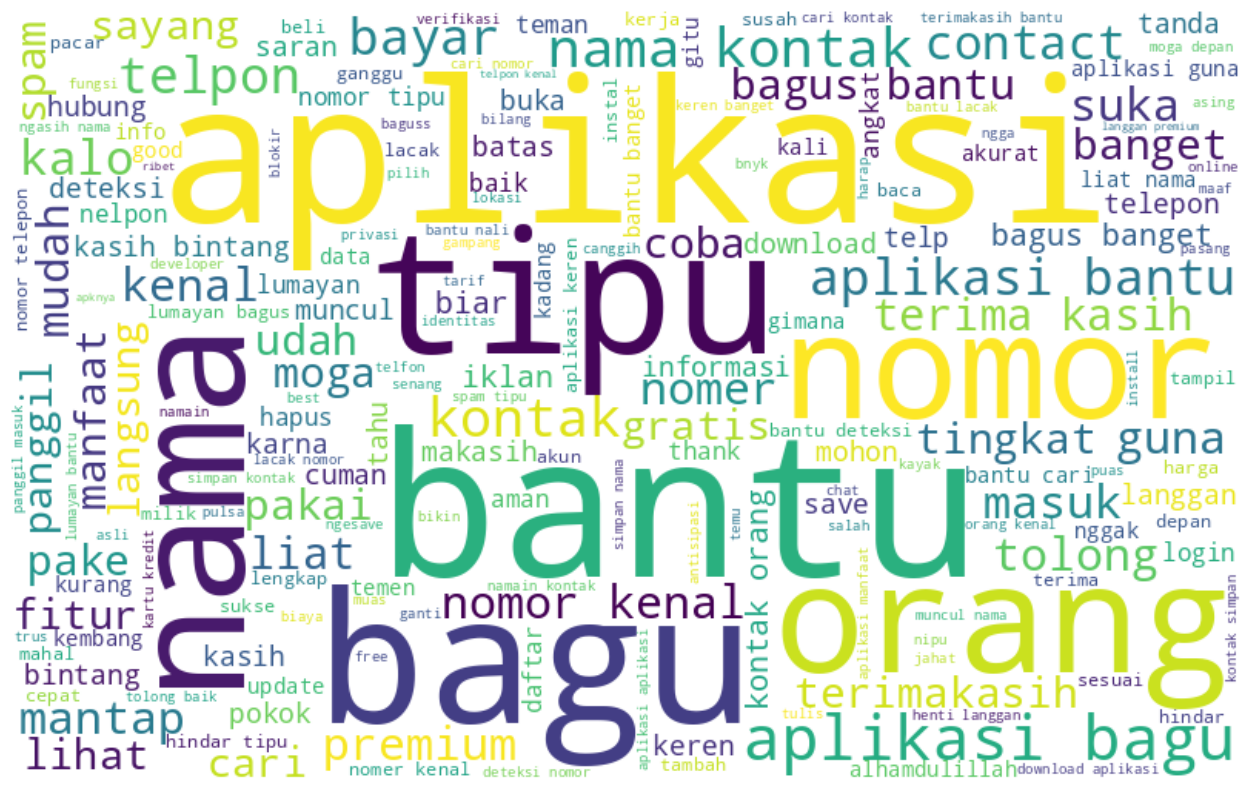

In [44]:
df_p=df[df['sentiment']==1]
all_words_lem = ' '.join([word for word in df_p['text_string']])

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

**Wordcloud Sentimen Negatif**

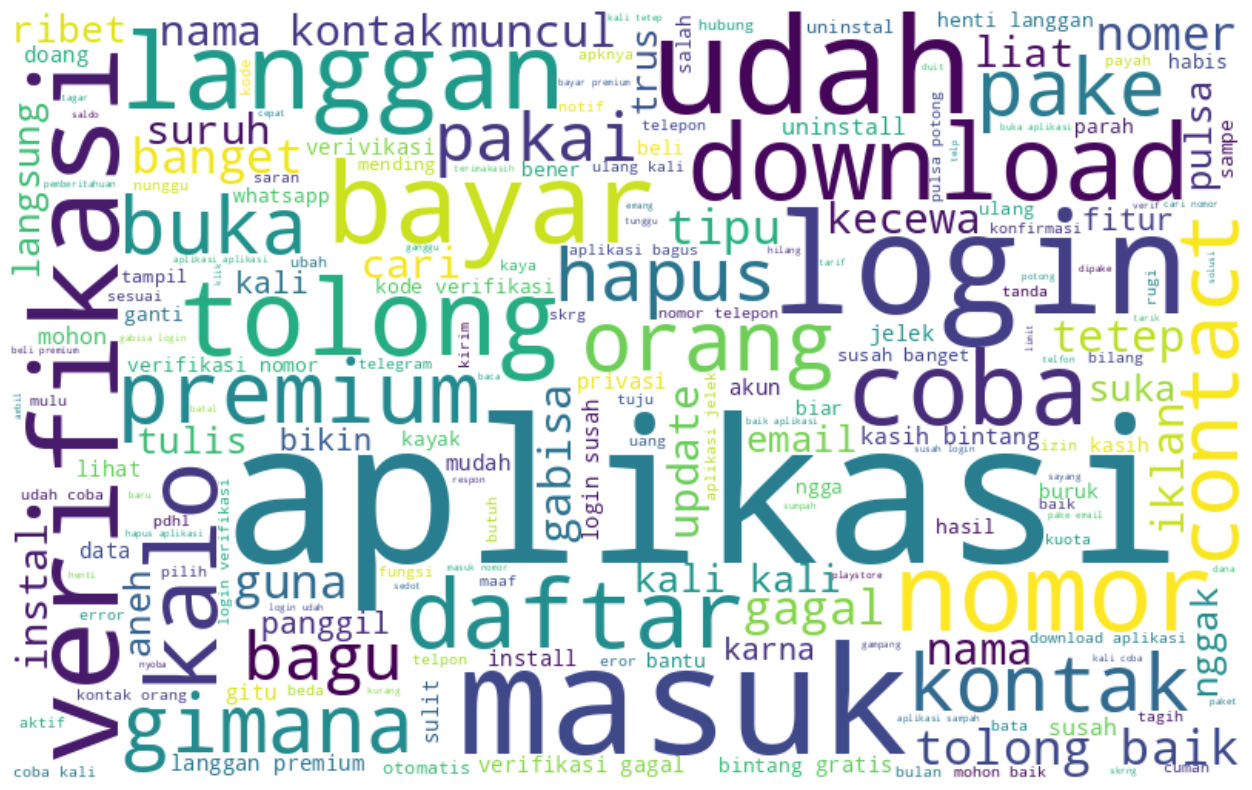

In [45]:
df_neg=df[df['sentiment']==-1]
all_words_lemneg = ' '.join([word for word in df_neg['text_string']])

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemneg)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

**Wordcloud Sentimen Netral**

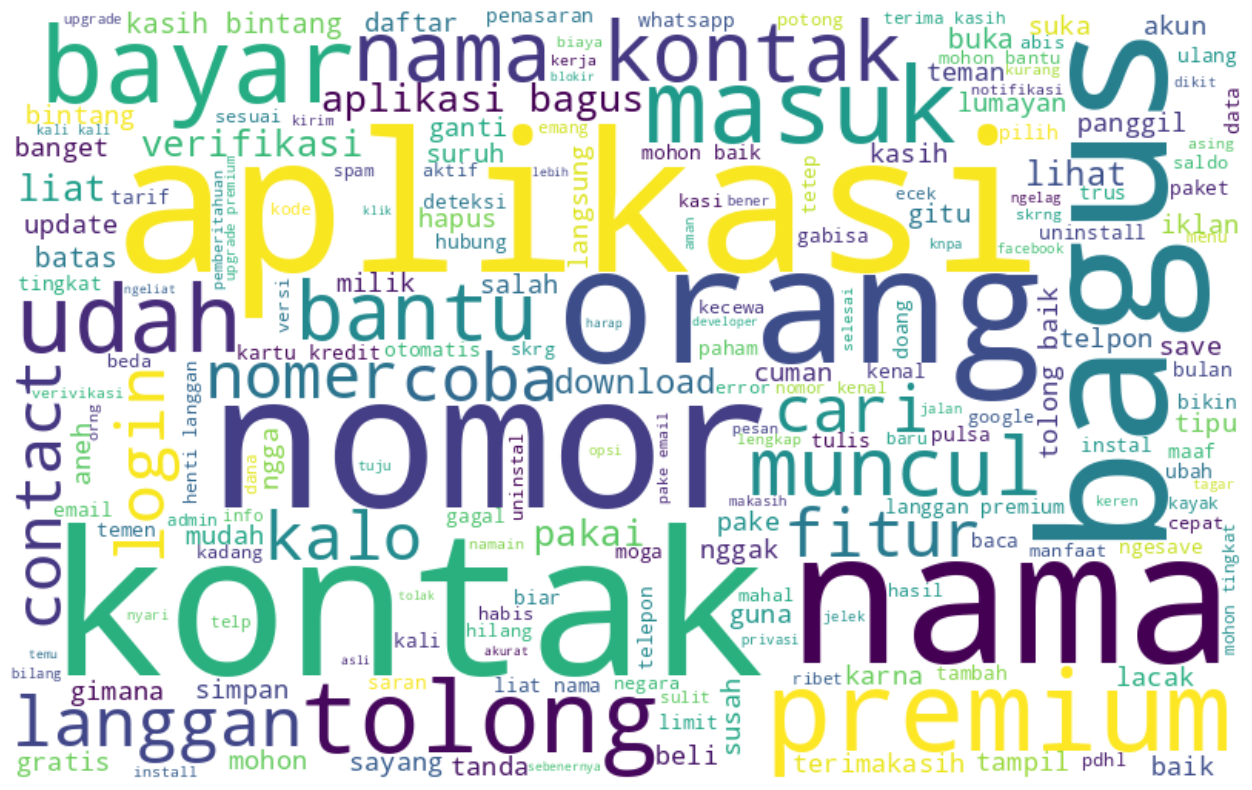

In [46]:
df_net=df[df['sentiment']==0]
all_words_lemnet = ' '.join([word for word in df_net['text_string']])

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemnet)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

**Sentimen Analisis Menggunakan Support Vector Machine**

**Penerapan TF-IDF**

In [47]:
X = df['text_string']
y = df['sentiment']

X = df['text_string']
y = df['sentiment']
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

**Handling Imbalance**

In [48]:
# Handling imbalanced menggunakan SMOTE

smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

**Pisahkan data train 90% dan data tes 10%**

In [49]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.1,random_state=3)

**Analisis sentimen dengan algoritma support vector machine (SVM)**

In [50]:
svm = SVC()
svm.fit(X_train,y_train)

svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.9068825910931174

**Pisahkan data train 80% dan data tes 20%**

In [57]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=3)

**Analisis sentimen dengan algoritma support vector machine (SVM)**

In [58]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.9051474840948525

**Pisahkan data train 70% dan data tes 30%**

In [59]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.3,random_state=3)

**Analisis sentimen dengan algoritma support vector machine (SVM)**

In [60]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8947368421052632

**Pisahkan data train 60% dan data tes 40%**

In [61]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.4,random_state=3)

**Analisis sentimen dengan algoritma support vector machine (SVM)**

In [62]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8830248698669751

**Pisahkan data train 50% dan data tes 50%**

In [63]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.5,random_state=3)

**Analisis sentimen dengan algoritma support vector machine (SVM)**

In [64]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.875882012724118

**Pisahkan data train 40% dan data tes 60%**

In [65]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.6,random_state=3)

**Analisis sentimen dengan algoritma support vector machine (SVM)**

In [66]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8615770194717564

**Pisahkan data train 30% dan data tes 70%**

In [67]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.7,random_state=3)

**Analisis sentimen dengan algoritma support vector machine (SVM)**

In [68]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8509460464347682

**Pisahkan data train 20% dan data tes 80%**

In [69]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.8,random_state=3)

**Analisis sentimen dengan algoritma support vector machine (SVM)**

In [70]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8286581839213418

**Pisahkan data train 10% dan data tes 90%**

In [71]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.9,random_state=3)

**Analisis sentimen dengan algoritma support vector machine (SVM)**

In [72]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.7976351134245871

**Memasukkan hasil uji ke dataframe**

In [74]:
# initialize list of lists
data_akurasi = [[90,10,90.68], [80,20,90.51],[70,30,89.47],[60,40,88.30],[50,50,87.58],
 [40,60,86.15],[30,70,85.09],[20,80,82.86],[10,90,79.76]]

# Create the pandas DataFrame
df_akurasi = pd.DataFrame(data_akurasi, columns=['data_train', 'data_tes',  'SVM'])

# print dataframe.
df_akurasi

,data_train,data_tes,SVM
0,90,10,90.68
1,80,20,90.51
2,70,30,89.47
3,60,40,88.30
4,50,50,87.58
5,40,60,86.15
6,30,70,85.09
7,20,80,82.86
8,10,90,79.76


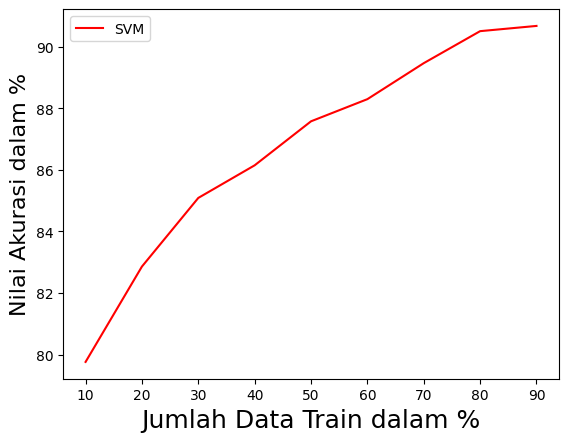

In [75]:
plt.plot(df_akurasi['data_train'], df_akurasi['SVM'], 'r', label='SVM')
plt.xlabel('Jumlah Data Train dalam %', fontsize=18)
plt.ylabel('Nilai Akurasi dalam %', fontsize=16)
plt.legend()
plt.show()

**Kesimpulan**

1. Hasil analisis sentimen aplikasi GetContact menunjukkan persentase sentimen postif sebesar 34.7%, sentimen negatif 57.6%, dan sentimen netral sebesar 7.7%

2. Sentimen yang didapat diuji akurasinya menggunakan algoritma Support Vector Machine (SVM) dan rata-rata hasil pengujian menggunakan algoritma ini sebesar 86.71%.